# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Your Code Here

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [2]:
fitbit = pd.read_csv("../data/Fitbit2.csv")
fitbit
fitbit.value_counts()

Date        Calorie burned  Steps  Distance  Floors  Minutes Sedentary  Minutes Lightly Active  Minutes Fairly Active  Minutes Very Active  Activity Calories  MinutesOfSleep  MinutesOfBeingAwake  NumberOfAwakings  LengthOfRestInMinutes  Distance_miles  Days       Days_encoded  Work_or_Weekend  Hours Sleep  Sleep efficiency  Yesterday_sleep  Yesterday_sleep_efficiency  Months     Months_encoded
2015-05-08  1934            905    0.65      0       1.355              46                      0                      0                    1680               384             26                   23                417                    0.403891        Friday     4.0           1                6.400000     92.086331         0.000000         0.000000                    May        5                 1
2016-01-15  3361            14837  11.37     11      687.000            210                     58                     71                   1917               0               0                    0    

#### From the Fitbit data, we want to visually understand:

How does the average number of steps change by month? Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or_Weekend columns.
* Set your size figure to 12,4
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

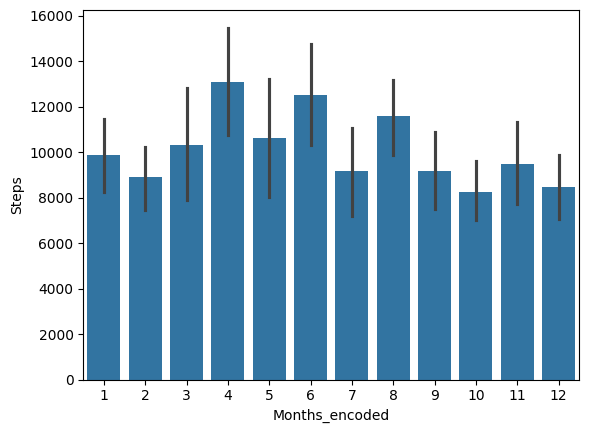

In [10]:
# Average number of steps by month

sns.barplot(data=fitbit, x="Months_encoded", y="Steps");


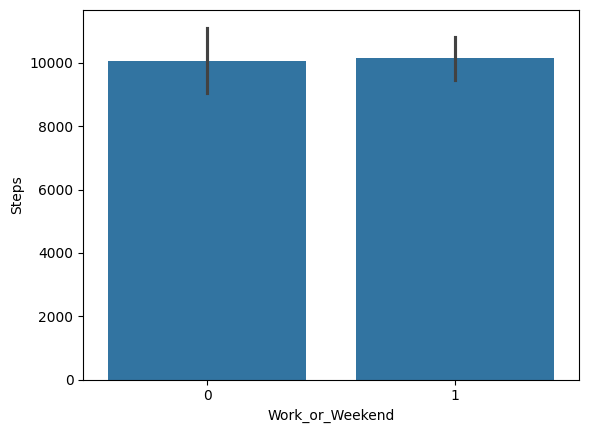

In [4]:
# Difference between steps in the week and the weekend

sns.barplot(data=fitbit, x="Work_or_Weekend", y="Steps");

In [ ]:
# median



#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

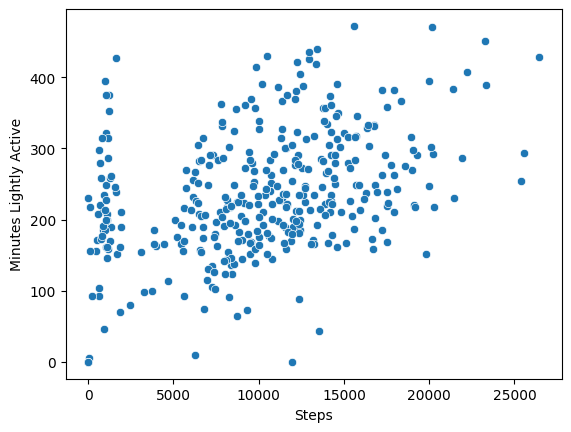

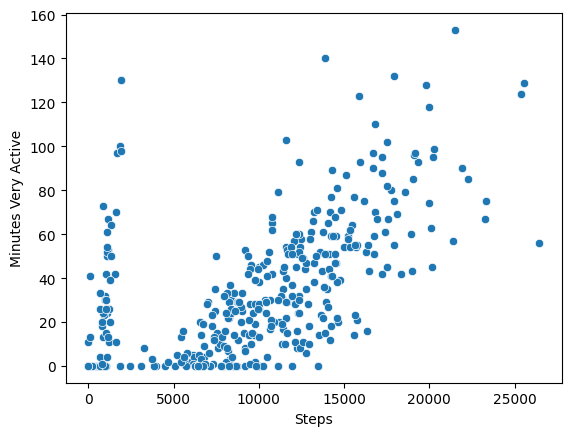

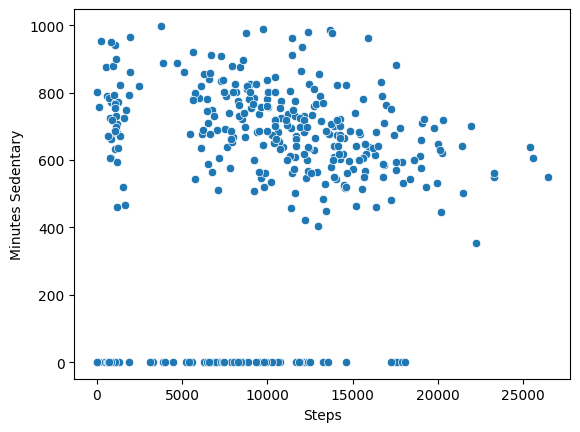

In [14]:
llista = ["Minutes Lightly Active", "Minutes Very Active", "Minutes Sedentary"]

for i in llista:
    plt.figure()
    sns.scatterplot(fitbit, x = "Steps", y = i)